In [1]:
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
%matplotlib inline
import pandas as pd
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:

data = pd.read_csv('../data/HPG.csv')
data.head()

,Unnamed: 0,time,open,high,low,close,volume
0,0,2018-01-02,10.66,10.86,10.56,10.85,4105100
1,1,2018-01-03,10.91,11.03,10.75,10.82,4828220
2,2,2018-01-04,10.87,11.00,10.82,10.96,4640280
3,3,2018-01-05,10.94,11.02,10.83,10.91,3660450
4,4,2018-01-08,10.85,11.25,10.80,11.25,3702750


In [3]:
def process_data(data):

    # Chia tập dữ liệu thành train/test (80% train, 20% test)
    x_train, x_test = train_test_split(data[['close']], test_size=0.2, shuffle=False)

    # Khởi tạo scaler
    scaler = MinMaxScaler(feature_range=(0, 1))

    # Fit scaler trên tập huấn luyện và transform cả train lẫn test
    train_scaled = scaler.fit_transform(x_train)
    test_scaled = scaler.transform(x_test)

    #Tạo vòng lặp giá trị, lấy 60 ngày trong quá khứ để dự đoán ngày tiếp theo
    x_train = []
    y_train = []
    for i in range(60, len(train_scaled)):
        x_train.append(train_scaled[i-60:i, 0])
        y_train.append(train_scaled[i, 0])

    x_test = []
    y_test = []
    for i in range(60, len(test_scaled)):
        x_test.append(test_scaled[i-60:i, 0])
        y_test.append(test_scaled[i, 0])

    #Chuyển dạng list sang dạng mảng numpy
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_test, y_test = np.array(x_test), np.array(y_test)

    #Xếp dữ liệu thành mảng 1 chiều
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    return x_train, y_train, x_test, y_test, scaler, test_scaled

In [17]:
x_train, y_train, x_test, y_test, scaler, test_scaled = process_data(data)

In [ ]:
from tensorflow import keras

#create model
def create_gru(units, dropout):
    model = Sequential()
    model.add(GRU (units = units, return_sequences = True,input_shape=(x_train.shape[1],1)))
    model.add(Dropout(dropout))
    model.add(GRU(units = units))
    model.add(Dropout(dropout))
    model.add(Dense(units = 1))
    model.compile(optimizer='adam',loss='mse')
    return model

In [6]:
#Fit the models

def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(x_train, y_train, epochs = 100,
                        validation_split = 0.2,
                        batch_size = 64, shuffle = False,
                        callbacks = [early_stop])
    return history

In [ ]:
#FPT
model_gru = create_gru(128, 0.2)
history_gru = fit_model(model_gru)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 321ms/step - loss: 0.0020 - val_loss: 0.0026
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 228ms/step - loss: 0.0014 - val_loss: 5.6880e-04
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 228ms/step - loss: 0.0016 - val_loss: 4.2665e-04
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 230ms/step - loss: 0.0081 - val_loss: 0.0019
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 228ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 230ms/step - loss: 0.0019 - val_loss: 3.0842e-04
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 242ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 224ms/step - loss: 0.0071 - val_loss: 4.1138e-04
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 222ms/step - loss: 0.0045 - val_loss: 0.0179
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 221ms/step - loss: 0.0091 - val_loss: 0.0130
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 256ms/step - loss: 6.0745e-04 - val_loss: 6.5257e-04
Epoch 12/100
17/

In [ ]:
#MSFT
model_gru = create_gru(128, 0.2)
history_gru = fit_model(model_gru)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 303ms/step - loss: 0.0016 - val_loss: 0.0031
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 239ms/step - loss: 0.0128 - val_loss: 0.0037
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 259ms/step - loss: 0.0177 - val_loss: 0.0436
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 263ms/step - loss: 0.0408 - val_loss: 0.0094
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 228ms/step - loss: 0.0024 - val_loss: 0.0103
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 238ms/step - loss: 0.0081 - val_loss: 8.4993e-04
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 236ms/step - loss: 0.0044 - val_loss: 0.0040
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 233ms/step - loss: 0.0031 - val_loss: 0.0059
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 224ms/step - loss: 0.0061 - val_loss: 7.3606e-04
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 241ms/step - loss: 0.0022 - val_loss: 0.0038
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 244ms/step - loss: 0.0035 - val_loss: 0.0024
Epoch 12/100
17/17 ━━━━━━━━━━━━━

In [ ]:
# BID
model_gru = create_gru(128, 0.2)
history_gru = fit_model(model_gru)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - loss: 0.0232 - val_loss: 0.0020
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - loss: 0.0086 - val_loss: 0.0055
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - loss: 0.0072 - val_loss: 0.0017
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - loss: 0.0089 - val_loss: 0.0031
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - loss: 0.0087 - val_loss: 0.0036
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - loss: 0.0056 - val_loss: 0.0025
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - loss: 0.0022 - val_loss: 9.1908e-04
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - loss: 0.0016 - val_loss: 8.9094e-04
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 12/100
17/17 ━━━━━━━━━━━━━━

In [ ]:
#HPG
model_gru = create_gru(128, 0.2)
history_gru = fit_model(model_gru)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - loss: 0.0127 - val_loss: 0.0077
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 0.0069 - val_loss: 0.0159
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.0097 - val_loss: 0.0240
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 0.0138 - val_loss: 0.0011
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - loss: 0.0056 - val_loss: 0.0149
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - loss: 0.0117 - val_loss: 0.0317
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - loss: 0.0175 - val_loss: 0.0020
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - loss: 0.0074 - val_loss: 0.0117
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - loss: 0.0138 - val_loss: 0.0378
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - loss: 0.0208 - val_loss: 0.0014
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - loss: 0.0081 - val_loss: 0.0029
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2

In [ ]:
#MWG
model_gru = create_gru(128, 0.2)
history_gru = fit_model(model_gru)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 151ms/step - loss: 0.0049 - val_loss: 0.0025
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - loss: 0.0019 - val_loss: 0.0048
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - loss: 0.0081 - val_loss: 0.0280
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - loss: 0.0161 - val_loss: 0.0141
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - loss: 0.0119 - val_loss: 0.0051
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - loss: 0.0069 - val_loss: 0.0011
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - loss: 0.0018 - val_loss: 8.9156e-04
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - loss: 6.3410e-04 - val_loss: 0.0013
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - loss: 7.0987e-04 - val_loss: 0.0019
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - loss: 5.3625e-04 - val_loss: 7.7700e-04
Epoch 12/100
17/17 ━━

In [ ]:
#VCB
model_gru = create_gru(128, 0.2)
history_gru = fit_model(model_gru)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 297ms/step - loss: 0.0057 - val_loss: 0.0071
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 260ms/step - loss: 0.0038 - val_loss: 0.0031
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 240ms/step - loss: 0.0035 - val_loss: 0.0028
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 235ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 233ms/step - loss: 0.0025 - val_loss: 0.0027
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 237ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 237ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 241ms/step - loss: 7.0851e-04 - val_loss: 7.4811e-04
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 240ms/step - loss: 7.6469e-04 - val_loss: 7.8548e-04
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 240ms/step - loss: 6.9897e-04 - val_loss: 6.1377e-04
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 243ms/step - loss: 7.7161e-04 - val_loss: 6.5575e-04
Epoch 12

In [ ]:
predict = model_gru.predict(x_test)
prediction_test_price = scaler.inverse_transform(predict)
actual_test_price = scaler.inverse_transform(y_test.reshape(-1, 1))

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step


In [ ]:
model_gru.save('../model/GRU-MSFT-128.h5')

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras import metrics

model_gru = load_model('../model/GRU-HPG-128.h5', custom_objects={'mse': metrics.MeanSquaredError()})

In [ ]:
#Tính toán các chỉ số đánh giá # FPT
rmse = np.sqrt(mean_squared_error(y_test,predict))
mae = mean_absolute_error(y_test, predict)
r2 = r2_score(y_test, predict)


print('RMSE: ', rmse)
print('MAE: ',mae)
print('R-squared: ',r2)

RMSE:  0.043330158319593935
MAE:  0.03430550221633801
R-squared:  0.9879964137146877


In [ ]:
#Tính toán các chỉ số đánh giá # MSFT
rmse = np.sqrt(mean_squared_error(y_test,predict))
mae = mean_absolute_error(y_test, predict)
r2 = r2_score(y_test, predict)


print('RMSE: ', rmse)
print('MAE: ',mae)
print('R-squared: ',r2)

RMSE:  0.02468863871043062
MAE:  0.01981207531167874
R-squared:  0.9206229453348366


In [ ]:
#Tính toán các chỉ số đánh giá # BID
rmse = np.sqrt(mean_squared_error(y_test,predict))
mae = mean_absolute_error(y_test, predict)
r2 = r2_score(y_test, predict)


print('RMSE: ', rmse)
print('MAE: ',mae)
print('R-squared: ',r2)

RMSE:  0.025965434801615978
MAE:  0.018602757476203796
R-squared:  0.957458336452506


In [ ]:
#Tính toán các chỉ số đánh giá # VCB
rmse = np.sqrt(mean_squared_error(y_test,predict))
mae = mean_absolute_error(y_test, predict)
r2 = r2_score(y_test, predict)


print('RMSE: ', rmse)
print('MAE: ',mae)
print('R-squared: ',r2)

RMSE:  0.023233136070539735
MAE:  0.01815675835034942
R-squared:  0.8075940552784172


In [ ]:
#Tính toán các chỉ số đánh giá # HPG
rmse = np.sqrt(mean_squared_error(y_test,predict))
mae = mean_absolute_error(y_test, predict)
r2 = r2_score(y_test, predict)


print('RMSE: ', rmse)
print('MAE: ',mae)
print('R-squared: ',r2)

RMSE:  0.012472551711663183
MAE:  0.009570521997325783
R-squared:  0.9174224261250428


In [ ]:
#Tính toán các chỉ số đánh giá # MWG
rmse = np.sqrt(mean_squared_error(y_test,predict))
mae = mean_absolute_error(y_test, predict)
r2 = r2_score(y_test, predict)


print('RMSE: ', rmse)
print('MAE: ',mae)
print('R-squared: ',r2)

RMSE:  0.024177600375859653
MAE:  0.01977601935345177
R-squared:  0.9792176911442254


In [30]:
dataa = pd.DataFrame({'Actual': actual_test_price.flatten(), 'Predicted': prediction_test_price.flatten()})
print(dataa)

           Actual     Predicted
0    6.813997e+12  5.558430e+12
1    1.428170e+13  5.054479e+12
2    9.478053e+12  9.106333e+12
3    8.239823e+12  8.371070e+12
4    2.378319e+13  7.048796e+12
..            ...           ...
295  6.102134e+16  8.102828e+15
296  8.659340e+16  1.801012e+16
297  1.006072e+17  1.721960e+16
298  4.090383e+16  1.736187e+16
299  2.031224e+16  6.886105e+15

[300 rows x 2 columns]


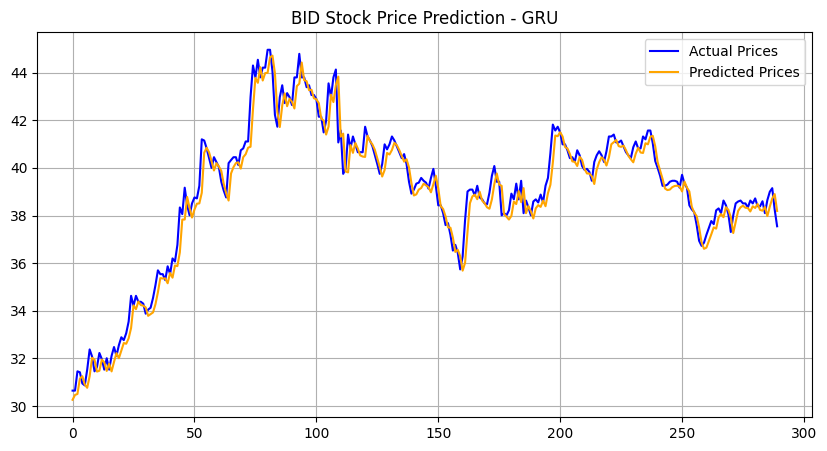

In [15]:
#Vẽ biểu đồ

plt.figure(figsize=(10,5))
plt.plot(actual_test_price,label='Actual Prices', color='blue')
plt.plot(prediction_test_price,label='Predicted Prices', color='orange')
plt.title('BID Stock Price Prediction - GRU')
plt.legend()
plt.grid(True)
plt.show()

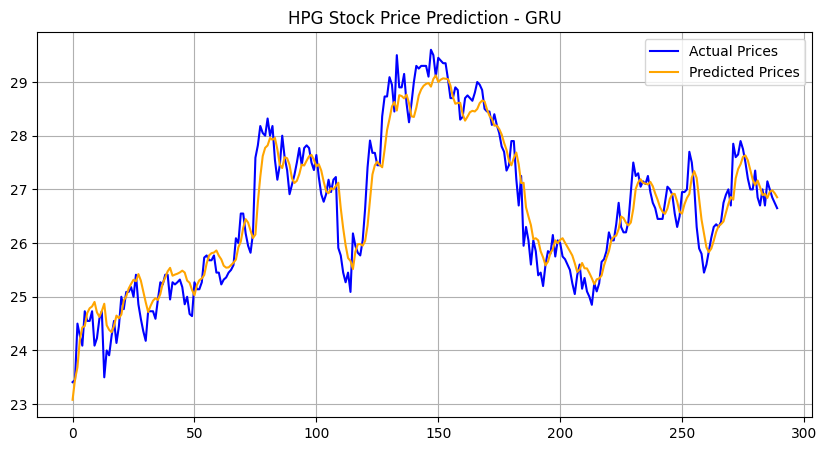

In [20]:
#Vẽ biểu đồ

plt.figure(figsize=(10,5))
plt.plot(actual_test_price,label='Actual Prices', color='blue')
plt.plot(prediction_test_price,label='Predicted Prices', color='orange')
plt.title('HPG Stock Price Prediction - GRU')
plt.legend()
plt.grid(True)
plt.show()

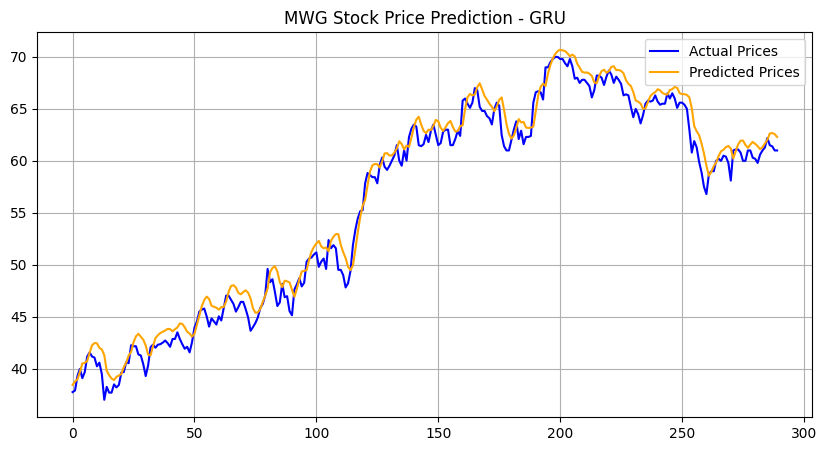

In [27]:
#Vẽ biểu đồ

plt.figure(figsize=(10,5))
plt.plot(actual_test_price,label='Actual Prices', color='blue')
plt.plot(prediction_test_price,label='Predicted Prices', color='orange')
plt.title('MWG Stock Price Prediction - GRU')
plt.legend()
plt.grid(True)
plt.show()

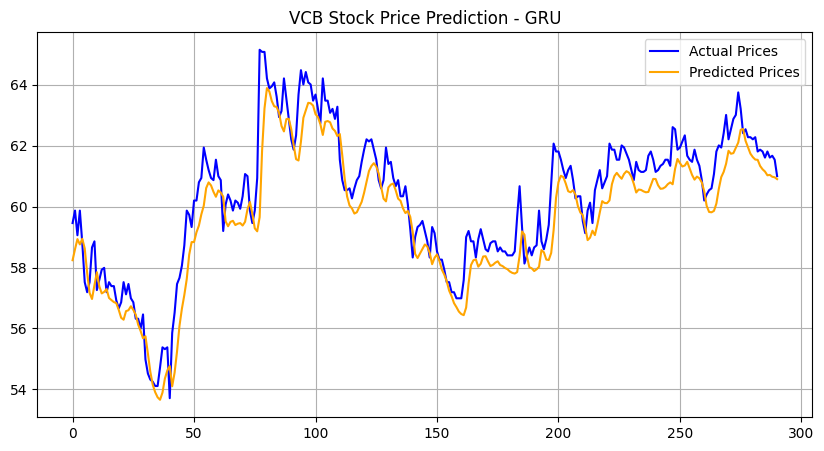

In [11]:
#Vẽ biểu đồ

plt.figure(figsize=(10,5))
plt.plot(actual_test_price,label='Actual Prices', color='blue')
plt.plot(prediction_test_price,label='Predicted Prices', color='orange')
plt.title('VCB Stock Price Prediction - GRU')
plt.legend()
plt.grid(True)
plt.show()

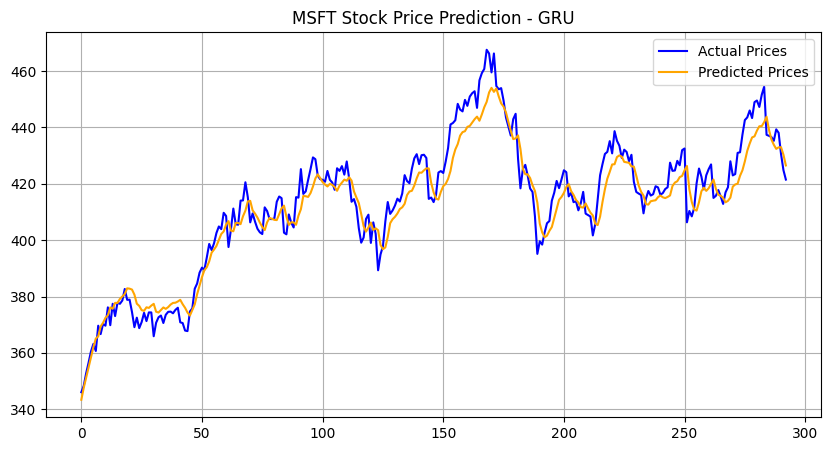

In [25]:
#Vẽ biểu đồ

plt.figure(figsize=(10,5))
plt.plot(actual_test_price,label='Actual Prices', color='blue')
plt.plot(prediction_test_price,label='Predicted Prices', color='orange')
plt.title('MSFT Stock Price Prediction - GRU')
plt.legend()
plt.grid(True)
plt.show()

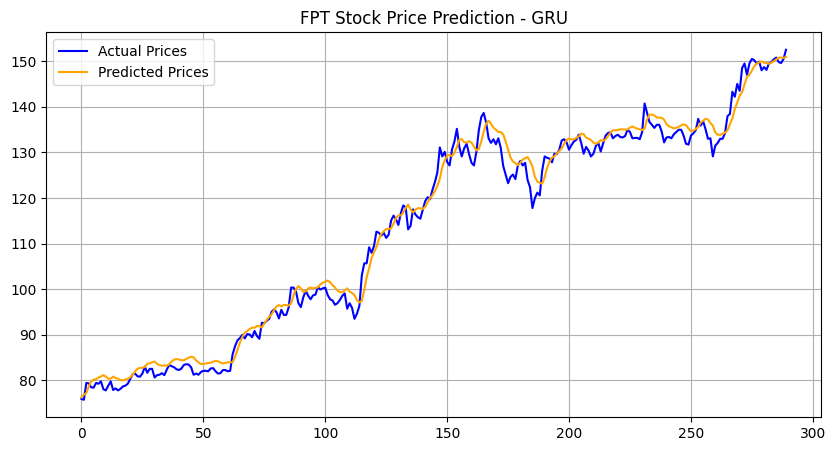

In [9]:
#Vẽ biểu đồ

plt.figure(figsize=(10,5))
plt.plot(actual_test_price,label='Actual Prices', color='blue')
plt.plot(prediction_test_price,label='Predicted Prices', color='orange')
plt.title('FPT Stock Price Prediction - GRU')
plt.legend()
plt.grid(True)
plt.show()